<a href="https://colab.research.google.com/github/skywalker0803r/python-tutoring-materials/blob/main/%E8%AA%B2%E7%A8%8B/301_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 301 Regression

View more, visit my tutorial page: https://mofanpy.com/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
* torch: 0.1.11
* matplotlib

In [22]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
torch.manual_seed(1)    # reproducible

# 這個我們要擬合的資料

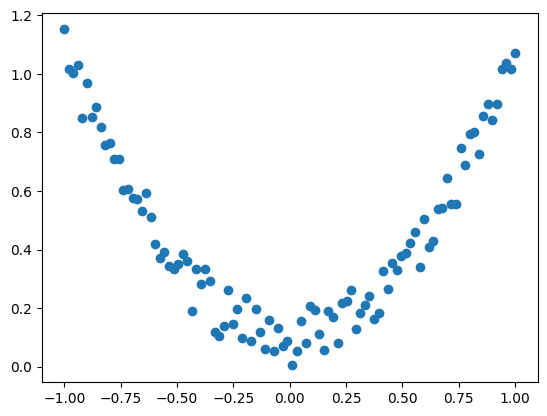

In [24]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

# 架神經網路

單一個隱藏層的架構

In [25]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [26]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


1.輸入特徵數量為1
2.隱藏層有10個神經元
3.輸出數量為1
的一個神經網路

# 有資料,有模型,那該怎麼訓練?

In [27]:
# 梯度下降的演算法(optimizer 中文就是優化器(利用loss對w計算出的梯度做模型權重的更新))
optimizer = torch.optim.SGD(net.parameters(), lr=0.2) # lr 學習率
# loss_func 中文就是損失函數 用來判斷預測值跟真實值的差異有多大
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [28]:
plt.ion()   # on持續 持續畫畫

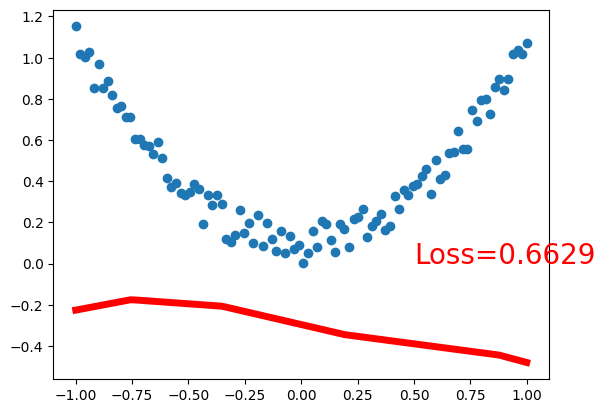

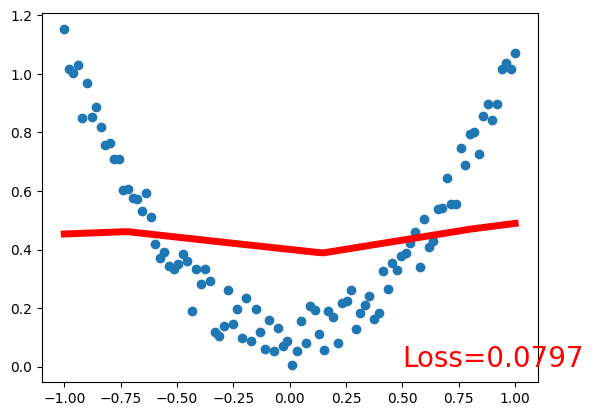

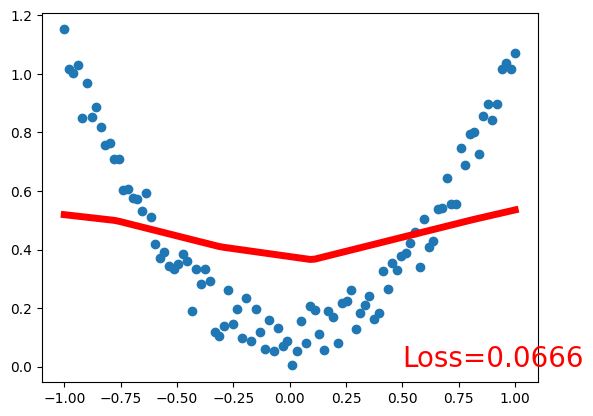

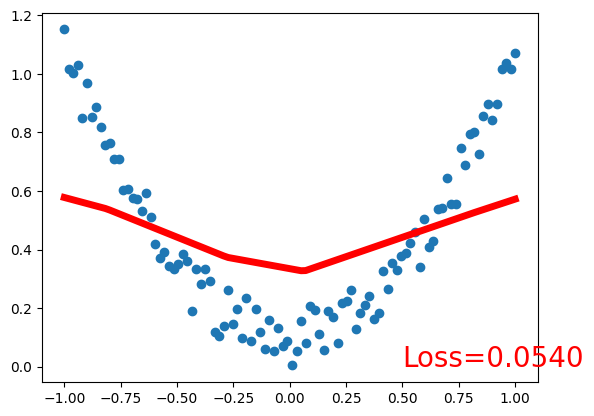

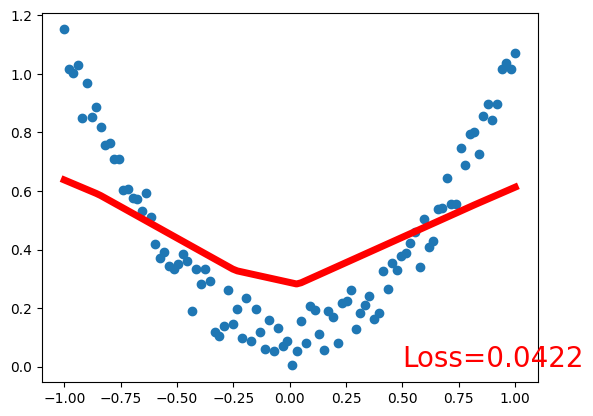

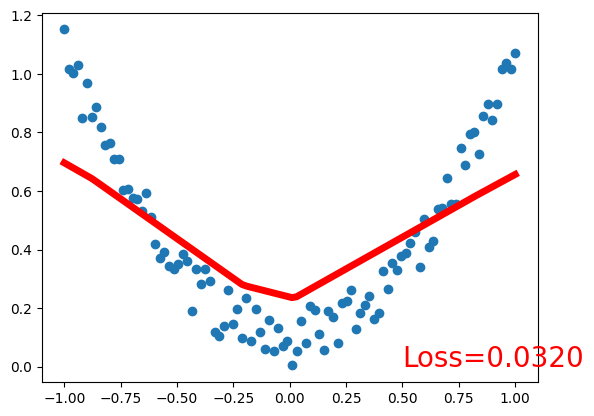

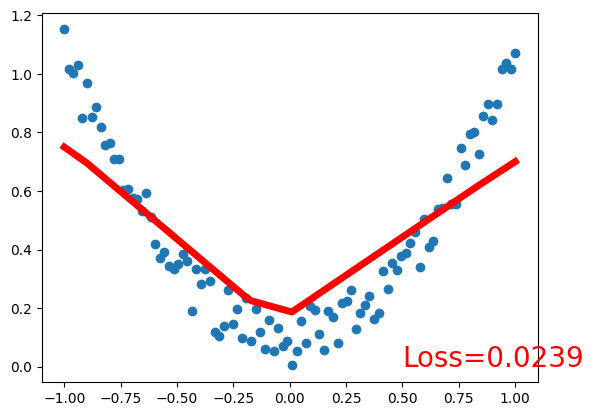

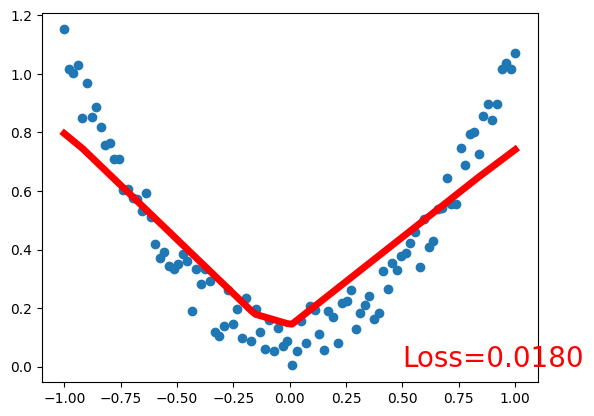

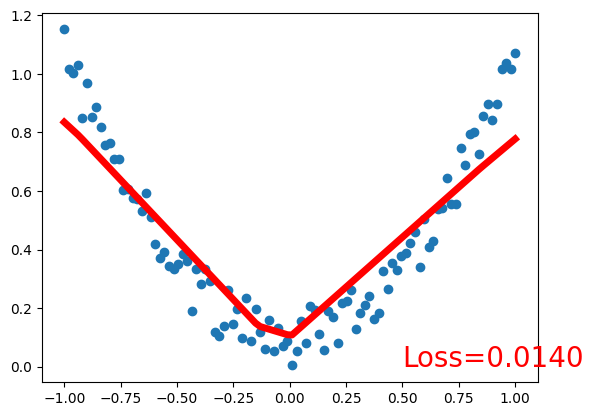

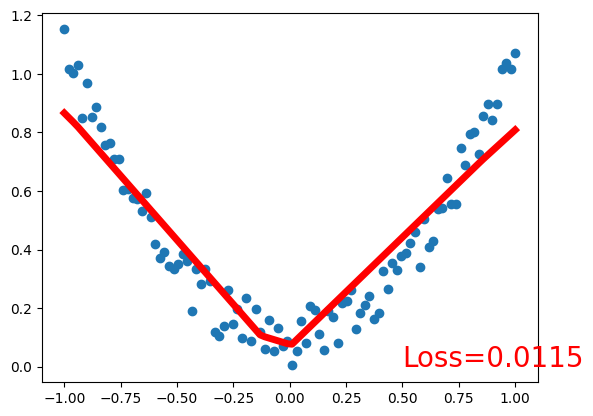

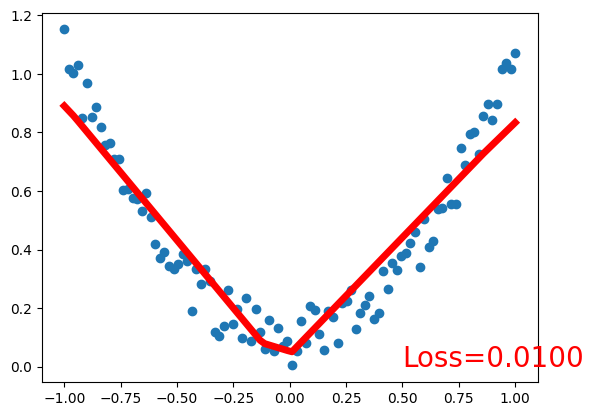

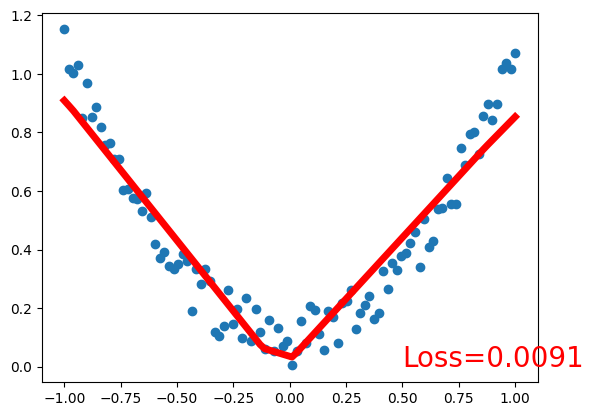

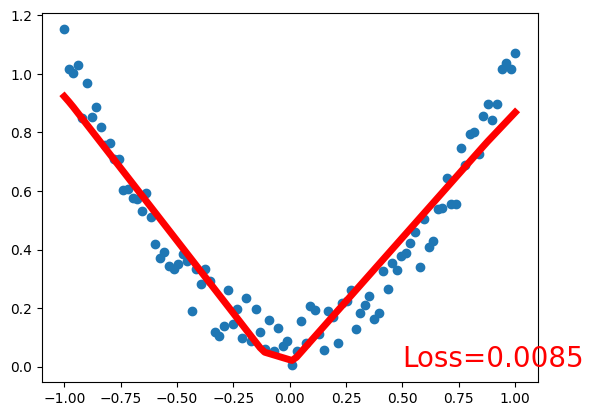

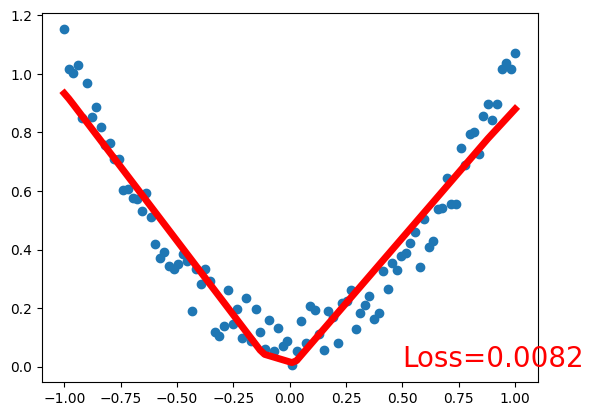

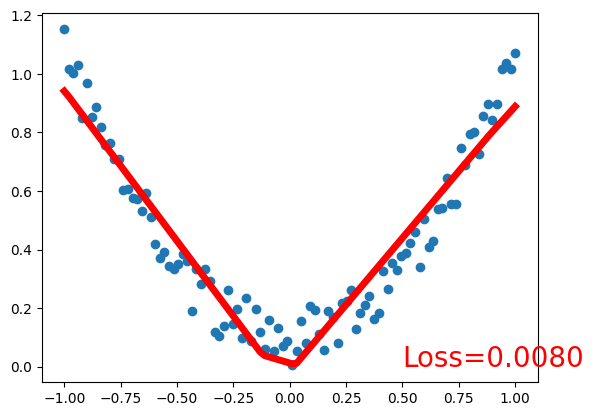

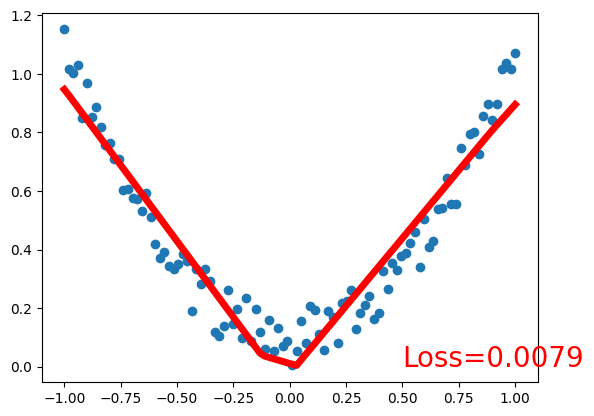

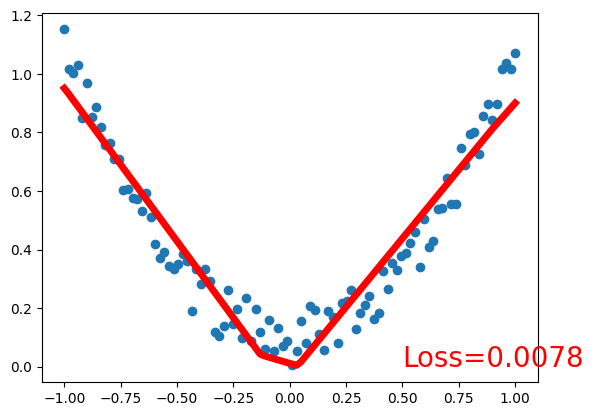

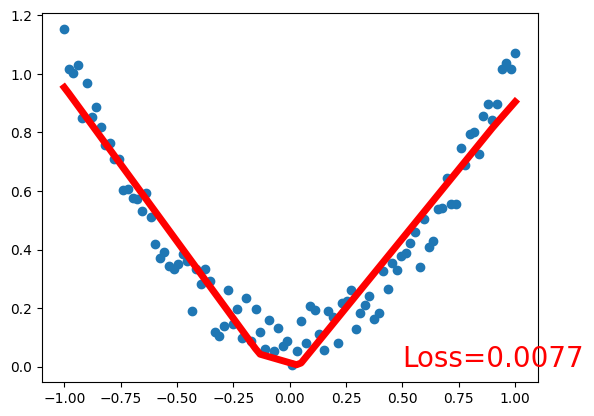

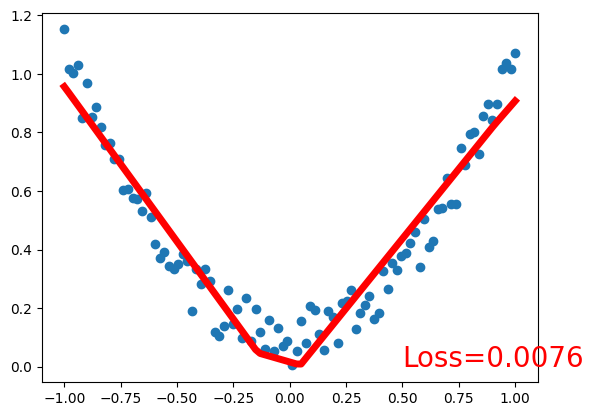

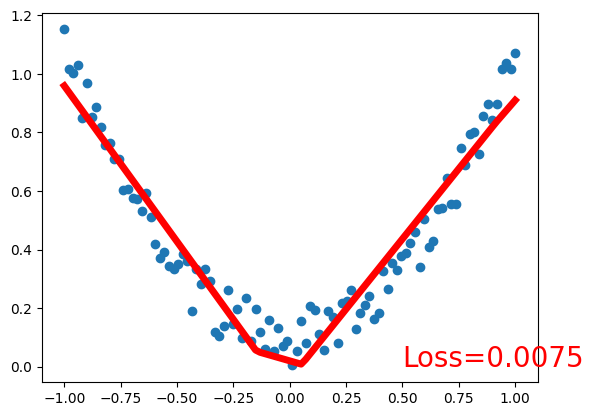

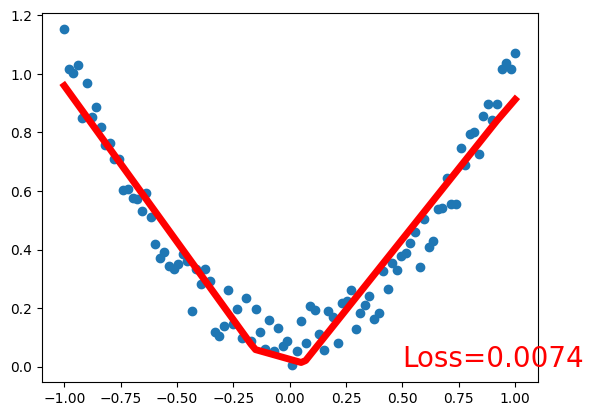

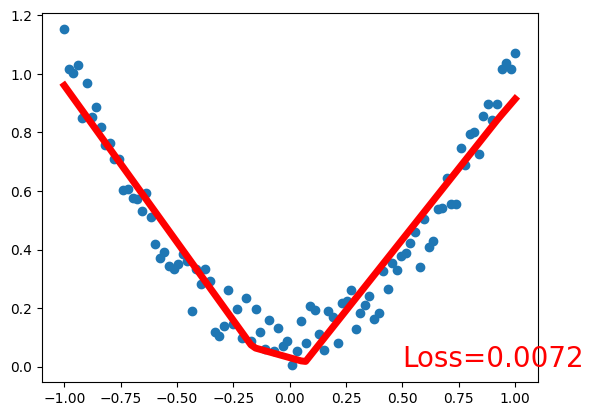

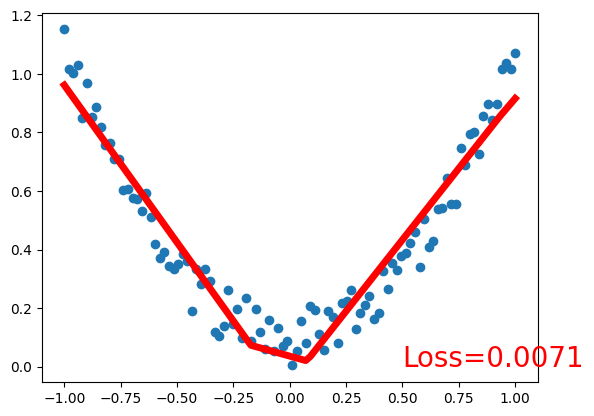

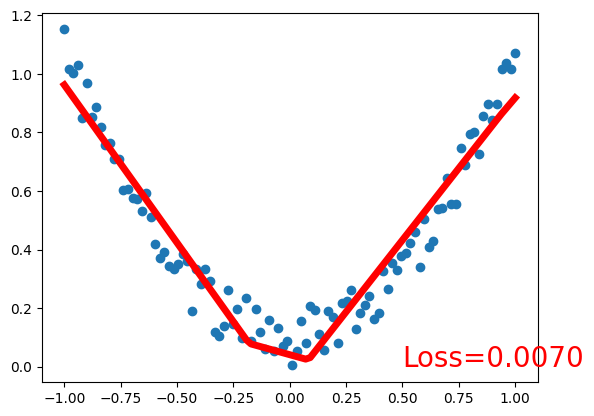

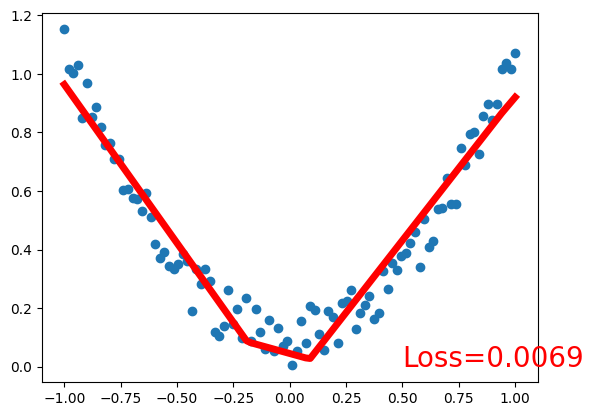

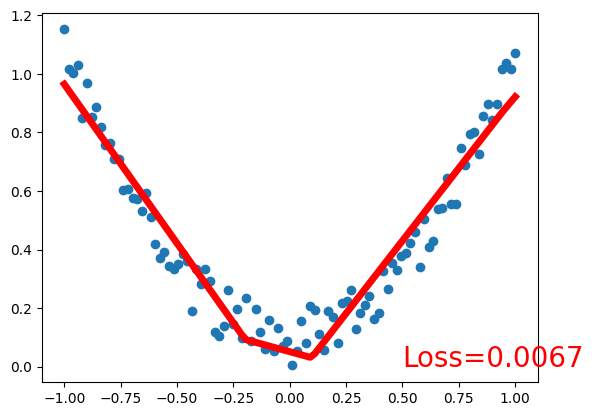

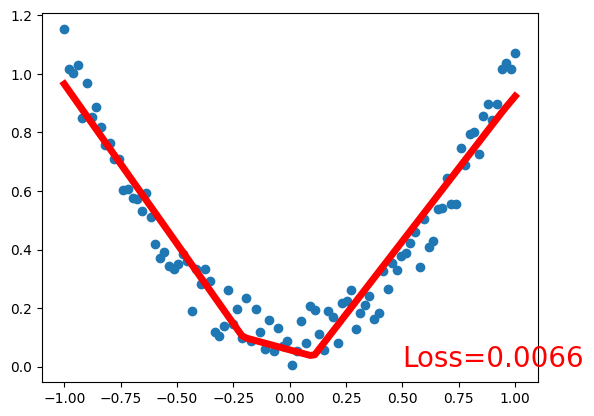

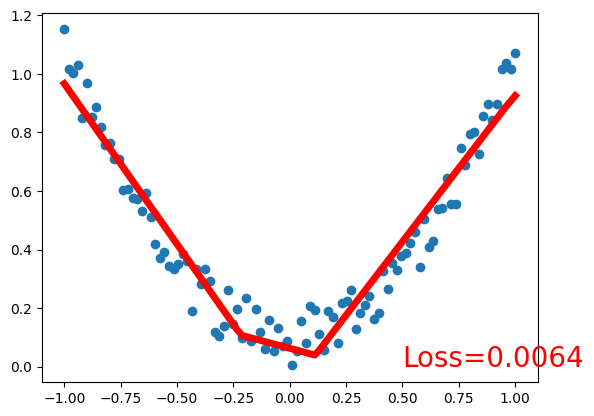

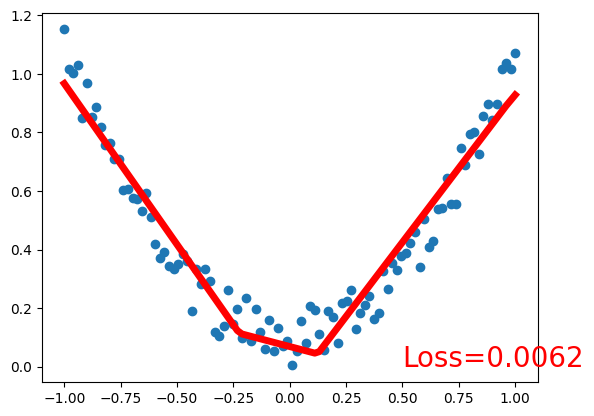

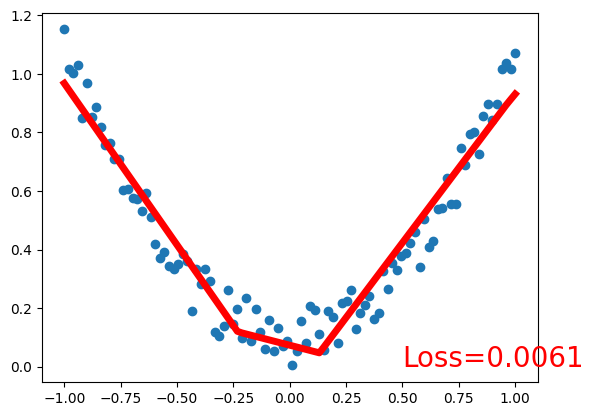

In [29]:
for t in range(300):#迭代100次
    # 從這裡開始 進行模型單次更新(一共迭代100次)
    # forward pass 前向傳播
    prediction = net(x) # 預測值
    # 預測值跟標準答案利用loss_func計算loss(差異量,損失量)
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    # 調用調用optimizer SGD優化:新權重 = 舊權重 - 學習率*梯度
    optimizer.zero_grad()# 先將梯度清空
    loss.backward()# 反向傳播計算梯度
    optimizer.step()# 優化器走一步(step)將梯度更新
    # 至此模型更新結束(此次結束 一共迭代100次)

    # 繪圖
    if t % 10 == 0: #每迭代10次暫停一下進行下面代碼的繪圖
        # 繪製學習過程
        plt.cla() # 清空畫布
        plt.scatter(x.data.numpy(), y.data.numpy()) #畫散點圖
        # 畫預測結果
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        # 加上Loss值的字上去畫布表示目前Loss多少
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        # 圖秀出來
        plt.show()
        # 暫停0.1秒避免人類肉眼看不清
        plt.pause(0.1)

plt.ioff() # off結束 結束畫畫
